In [ ]:
# Mount
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
%cd "/content/drive/MyDrive/CS7643-project/scripts"
%load_ext autoreload
%autoreload 2

/content/drive/MyDrive/CS7643-project/scripts


In [ ]:
# Install required packages
%cd "/content/drive/MyDrive/CS7643-project/scripts"
!pip install -r requirements.txt

In [ ]:
from data_loader import ImagerLoader
import torch.utils.data
import torchvision.transforms as transforms

In [ ]:
train_loader = torch.utils.data.DataLoader(
    ImagerLoader('../data/images/',
                 transforms.Compose([
                     transforms.Scale(256),
                     transforms.CenterCrop(256),
                     transforms.RandomCrop(224),
                     transforms.RandomHorizontalFlip(),
                     transforms.ToTensor(),
                 ]), data_path='../data/', partition='train', sem_reg=False),
    batch_size=2, shuffle=False, num_workers=1, pin_memory=True
)


In [ ]:
it = iter(train_loader)
input, target = next(it)


torch.Size([3, 224, 224])


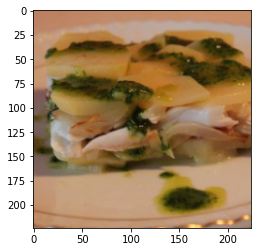

In [ ]:
import matplotlib.pyplot as plt
print(input[0][0].shape)
plt.imshow(input[0][0].permute(1, 2, 0))


In [ ]:
from recipe_model_resnet50 import JointEmbeddingModel
model = JointEmbeddingModel()
output = model(*input)
print([output[i].shape for i in range(len(output))])


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

[torch.Size([2, 1024]), torch.Size([2, 1024]), torch.Size([2, 1048]), torch.Size([2, 1048])]


In [ ]:
!python train_resnet50.py -batch_size 16 -n_workers 8 \
  -epoch 100 -valfreq 5 -medr 500 -early_stop 1000 \
  -checkpoint_path ./snapshot_resnet50/ \
  -train_loss_output ./results_resnet50/train_loss_resnet50.txt \
  -val_loss_output ./results_resnet50/val_loss_resnet50.txt \
  -val_recall_output ./results_resnet50/val_recall_resnet50.txt \
  -resume_path ./snapshot_resnet50/model_epoch_055_val_55.200.pth.tar
